##  Dynamic Programming and Iterative Policy Evaluation

This notebook serves as a summary of everything we came across on Dynamic Programming. It also has an explination on how to implement gridworld in Python and walks you through the derivations following from the previous notebook on Markov decision process. The derivations are also provided, they are not necessary to understand in order to implement but we decided to follow through the derivations in order to appreciate how one came to the results. Note that these notebooks are written informally but are to serve as a tool in trying to summarize our findings on RL and to return to at a later stage if deemed necessary.

[See Chapter 4, Sutton and Barto](http://incompleteideas.net/book/bookdraft2017nov5.pdf)


    Dynamic programming (DP) is a collection of algorithms that can be used to compute optimal policies given a perfect model of the environment as a Markov decision process (MDP). Classical DP algorithms are of limited utility in reinforcement learning both because of their assumption of a perfect model and because of their great computational expense, but they are still important theoretically. dynamic programming provides an essential foundation for the understanding of the methods presented here.

- This section: Solutions to MDPs
- Centerpiece of MDP: The Bellman Equation
$$ V_{\pi}(s) = \sum_{a} \pi (a|s) \sum_{s^{'}}\sum_{r} p(s^{'},r|s,a)\left \{ r + \gamma V_{\pi}(s^{'}) \right \} $$

<span style='color:pink'>
We looked at the Bellman equation which recursively defines the value function in terms of the value function at the next day (state).</span>

- If you look carefully, this can be used to solve for $V(s)$ **directly**
- $\left | S \right |$ equations, $\left | S \right |$ unknowns (linear problem)
- Many entries will be 0, since transitions $s \rightarrow s'$ are sparse
- Instead, we will use **iterative policy evaluation**

<span style='color:blue'>
The centrepiece of the last section was the Bellman Equation. In fact, the Bellman Equations can be use directly to solve for the value function.
</span>

<span style='font-family:"Times New Roman"'> <span styel=''> Depicting the state-value function as $v_{\pi}$ for an abitrary policy $\pi$ we show what is refered to as **policy evaluation** (or prediction problem) for all $s \epsilon S$ as:
    
    

<span style='font-family:"Times New Roman"'> <span styel=''> 
$$
\begin{align}
v_{\pi}(s) &= E_{\pi}[G_{t} | S_{t}=s] & \\
&= E_{\pi}[R_{t+1}+ \gamma G_{t+1}  | S_{t}=s]& \text{ as }G_{t} = R_{t+1}+ \gamma \text{ } G_{t+1} \\
&= E_{\pi}[R_{t+1}+ \gamma \text{ } v_{\pi} (S_{t+1} )  | S_{t}=s] & \text{ since } G_{t+1} = \text{ } v_{\pi} (S_{t+1} ) \\
&= \sum_{a} \pi (a|s) \sum_{s^{'}}\sum_{r} p(s^{'},r|s,a)\left \{ r + \gamma V_{\pi}(s^{'}) \right \}
\end{align}
$$

<span style='color:blue'>
If you look carefully, you'll see that this is actually a set of s equations with S unknowns. In fact it is a linear equation which means that it's not hard to solve.
</span>

<span style='color:blue'>
In addition, a lot of the matrix entries will be zero since probably the state transitions will be sparse. However, this is not the approach we'll take. Instead we'll do what is called iterative policy evaluation.
</span>

#### Iterative Policy Evaluation

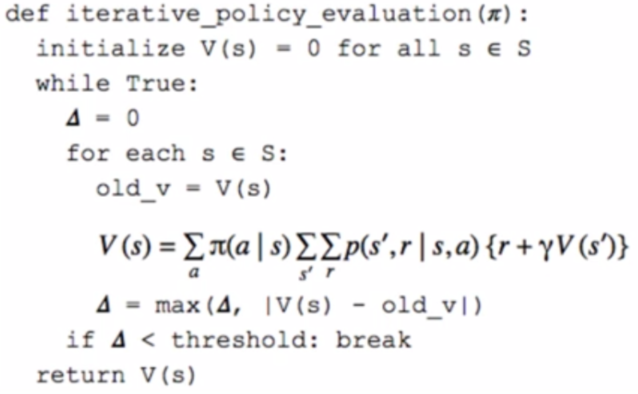

This is shown by [Sutton and Barto](http://incompleteideas.net/book/bookdraft2017nov5.pdf) as an algorithm as:

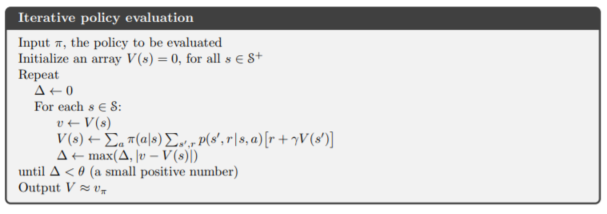

What is iterative policy evaluation?

Essentially, it means we apply the Bellman Equation
again and again and eventually it will just converge.

This makes sense since, at the point we found the solution,
the left hand side will equal the right hand side,
so any further iteration won't change anything.


The Algorithm is written above as follows. 

- The input into iterative policy evaluation is a policy pie.
- The output is the value function for this policy.

- We start out initialising $V(s)$ equals to zero for all states.
- Then in an infinite loop, 
    - we initialise the variable called Delta.
    - Delta represents the maximum change during the current iteration.
    - We use delta to determine when to quit.
    - When delta is small enough, that's when we'll break out of the loop.

- Then for every state in the state space, we keep a copy of the old $V(s)$ (<code>old_v</code>)
- and then we use Bellman's Equation to update $V(s)$. (i.e. $V(s)= \sum_{a} \pi (a|s) \sum_{s^{'}}\sum_{r} p(s^{'},r|s,a)\left \{ r + \gamma V_{\pi}(s^{'}) \right \}$ )


- We set delta to be the maximum change in v of s for that iteration. <code>V(s)-old_V(s)</code>


- Once this converges, we return $V(s)$.

#### Iterative Policy Evaluation

- Technically, it's defined where $V(s)$ at iteration $k+1$ is updated from $V(s)$ at iteration $k$
- But we can update $V(s)$ "in place", to use the most recently updated values 
- Converges faster!

The main point of interest in the algorithm is
of course the part that contains the Bellman Equation.
Notice how, strictly speaking, the values
at iteration $k+1$ depend only on the values at iteration $k$.

However, this need not be the case.
In fact, we can always just use our most up to date versions
of a value function for any state.
This **actually ends up converging faster**.

#### Definitions
- What we just did (finding $V(s)$ given a policy) is called the **prediction problem**
- Finding the optimal policy is called the **control problem**
- Every section in these notebooks from here onward will cover both of these in this order

One last note is that we usually call the act
of finding the value function
for a given policy the prediction problem.

Later in this section, we'll learn an algorithm
for finding the optimal policy.
This is called the control problem.

We'll first look at the prediction problem
to find the value function for a given policy
and then we'll look at the control problem
to find the optimal policy.
___

## GridWorld in Code

In this section we're going to start implementing grid world in code. This is needed to understand all subseqent notebooks.

At the top here we have our standard imports.

Next we have the <code>Grid</code> class. The constructor takes in the width, height and <code>start</code> position.
The start position should be a tuple of two integers, and the current location will be stored in the instance variables, i and j.


We can see <code> self.i = start[0] </code> as the i in the instance and <code> self.j = start[1] </code> as the j in the instance.
    

class Grid: # Environment
  def __init__(self, rows, cols, start):
  '''
  Input:
  rows = "the height of the board "
  cols = "the width of the board"
  start = "start position should be a tuple of two integers, and 
           the current location will be stored in the instance variables, i and j."
  '''
    self.rows = rows
    self.cols = cols
    self.i = start[0]
    self.j = start[1]

Next, we have a setter <code>set</code> that can set the rewards
and the actions of the environment simultaneously.

The actions, to be clear,
enumerate all the possible actions
that can take you to a new state.

So for example, if there is a wall above you,
you could try the action up,
but you wouldn't actually go up,
since that wouldn't be in the actions dictionary.
The grid class will simple ignore it.

So both rewards and actions will be
dictionaries where the key is the
i,j coordinate representing the state,
and the value is either a numerical reward,
or a list of possible actions.

Later you'll see that the actions will be
represented by the strings U, D, L and R.

Next we have the <code>set_state</code> function.
This function will be useful for
the various algorithms we'll be using.

For example, iterative policy evaluation
requires us to loop through all the states,
and then do an action to get to the next state.

In order to know what the next state is,
we have to actually put the agent into that state,
do the action and then determine the next state.
We don't automatically have
a master list of state transitions,
we need to figure them out by playing the game.

Next we have the <code>current_state</code> function.
This tells us the current i,j position of the agent.

Next we have the <code>is_terminal</code> function. This returns a Boolean, true if the argument S is a terminal state, false if not.

An easy way to determine if we're in a terminal state
is to check if the state is in the actions dictionary.
If you can do an action from the state
then you can transition to a different state,
and if that's the case, then your state is not terminal (See previous notebook for an explination of why this is so). 

Next we have the <code>move</code> function.
This takes in the action as an argument.
The first thing the function does is
check if the action is in the actions dictionary.
If it's not then we can't do this movement on the grid,
so we simply stay in the same position.

Note that if we follow array conventions here,
so "i" is zero at the top and increases downward,
"j" is zero at the left and increases going right.

At the end we return the reward for
the current position from the rewards dictionary.

The current position can be a
new position after taking the action,
or it can simply be the same position,
if the action that was passed in
did not result in any movement.

Note that if there is no reward defined for
this position, the default is just zero.

Next we have the <code>undo_move</code> function.
The idea is you would pass in the action you just did,
and the environment will undo it.
So if you just did up, it'll move you back down.

<code> assert(self.current_state() in self.all_states())  </code>


At the end there's a sanity check,
to ensure that the current state is
in the set of all allowed states.
The code should never reach this point,
which is why we put an <code>assert</code> here.

Next, similar to the tic-tac-toe game,
we have the <code>game_over</code> function,
which returns True if a game is over,
and False if not.
In this scenario, game over is much easier,
since all we need to do is
check if we are in a terminal state.

Lastly we have the <code>all_states</code> function,
which we used earlier in undo move.
We can calculate all the states,
simply by enumerating all the states
from which we can take an action,
which don't include terminal states
and all the states that return a reward,
which do include terminal states.

Since there might be some states
in both the action keys and the reward keys,
we cast it to a set.
This also makes the data structure an all-of-one search.

Next we have the <code>standard_grid</code> function,
which returns what I'll refer to as the standard grid.
This is a grid that has the
rewards structure I showed you earlier,
with plus one reward at the top right,
and minus one reward underneath it,
and both of those are terminal states. 

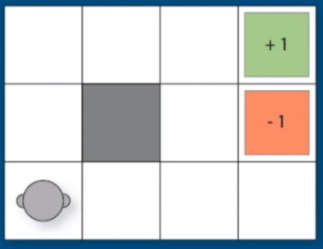

All the actions are defined such that
we can move within the grid but never off it.
We also can't walk into the wall,
nor can we walk out of a terminal state.

Next we have the <code>negative_grid</code> function.
The idea behind this is that we want to penalise each move.

Recall earlier when we talked about solving a maze.
We said that a robot that just moved randomly
would eventually solve the maze,
and if you only gave it a reward for solving the maze,
then it would never learn anything beyond a random strategy.

We learned that we could incentivize the robot
to solve the maze more efficiently,
by giving it a negative reward for each step taken,
and so that's what we're doing here.

We're incentivizing the robot to solve the maze efficiently,
rather than moving randomly until it hits the goal.

Below we then provide the grid world in a complete form:

In [21]:
# Premable
import numpy as np
import matplotlib.pyplot as plt

## Designing your RL program

Recap on the form of a Supervised learning problem:

Since this is reinforcement learning that's not going to be what we'll do.
However that doesn't mean there isn't a pattern to be followed.
First I want to make it clear that the design and layout of your program is part of your homework.
If you think the exercises in this course are going to be to write one or two lines of code you are
in for a big surprise as we did in the bandit section.
We're going to learn about several different algorithms but the beauty of these algorithms is that like
supervised learning they all have the same interface.
So whatever your design you're basically just going to be implementing the same thing multiple times.
The only difference should be the algorithm itself not the layout.

With that said it is still possible to go over the basic steps that your script must perform.
First realize that there are two different problems we will try to solve in this course.
So you'll have two different kinds of scripts.

#### 2 types of problems, 2 types of scripts

1) Prediction Problem: Given a policy $\pi$, find the corresponding value function $V(s)$

2) Control Problem: Find the optimal policy and the corresponding value function

#### 1) Prediction Problem
- Goal is find $V(s)$

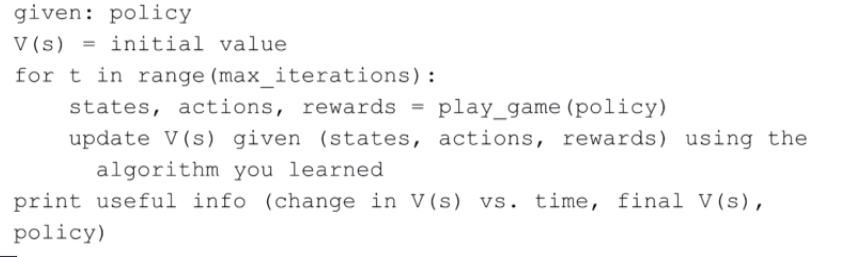

First we initialize $V(s)$. Then in a loop, we play the game according to the given policy. From this playing of the game, we collect data about the states actions and rewards then we use those states actions and rewards to update our value function $V(s)$ according to whatever algorithm we just learned about.

At the end we might want to plot or print some useful information such as the change in view of as per iteration. The final values of $V(s)$ and the actual policy itself so that we can ensure that the values we found make sense.

#### 2) Control Problem
- Goal: Find the optimal policy
- Sidenote: Policy may notbe explicitly represented

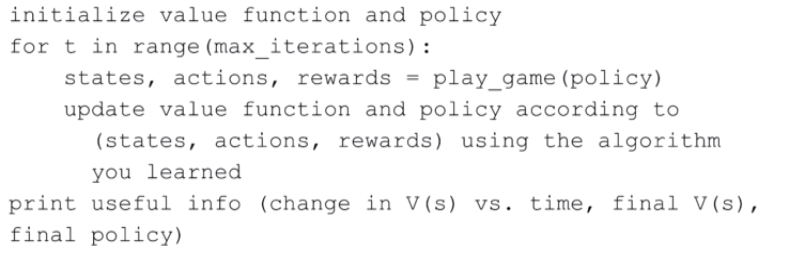

The second kind of problem is the control problem. This is where our agent will engage with its environment and do actual learning.
The goal of the second problem is to find the optimal policy and the optimal corresponding value function.

The second type of problem, the control problem is a bit more difficult as it requires us to update two things at the same time : the policy and the value function. In this case you're not given a policy but rather your goal is to update the policy according to whatever algorithm you learn.

Still the basic loop is the same ,first we initialize the value function that can be V or Q ,depending on the algorithm being discussed. Then we enter a loop. For a certain number of iterations inside the loop , we play an episode of the game using the current policy. From this, we get a series of states actions and rewards that the agent experienced. 

Then we update the value function and the policy using whatever algorithm we just learn about at the end.
We again might want a plot or print some useful information such as the change in the value function per iteration, the final values of the value function and the final policy so that we can verify that it makes sense.

Now I want to make it clear that this is just a very rough outline in actuality for some algorithms the policy is not explicitly represented in code and so it's not actually going to be represented by a python variable but again that's kind of part of the implementation.

So it's partly your choice about how you want to do things.